In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
#reading in excel file

df1 = pd.read_excel('QVI_transaction_data.xlsx')
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
#info on first dataframe datatypes and non-nulls

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
#reading in second dataframe

df2 = pd.read_csv('QVI_purchase_behaviour.csv')
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
#looking at second dataframe datatypes and non-nulls

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
#merging both dataframes on loyalty card number

df_main = df1.merge(df2, on='LYLTY_CARD_NBR')
df_main.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [7]:
#looking at merged dataframe

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [8]:
#copying main dataframe for wrangling (df_wrangle)

df_wrangle = df_main.copy()

In [9]:
#converting store number to string values

df_wrangle['STORE_NBR'] = df_wrangle['STORE_NBR'].astype(str)

In [10]:
#converting dates from default excel format to pandas datetime format

df_wrangle['DATE'] = pd.to_datetime(df_wrangle['DATE'], unit='D', origin='12-30-1899')
df_wrangle.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [11]:
#creating date dataframe grouping by date and counting transaction ids

df_date = df_wrangle[['DATE', 'TXN_ID']].groupby(by='DATE', as_index=False).count()
df_date.head()

,DATE,TXN_ID
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712


In [12]:
#looking at size of dataframe -- showing 364 entries, so one missing date

df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    364 non-null    datetime64[ns]
 1   TXN_ID  364 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.5 KB


In [13]:
#looking at quantities of certain types of chips sold

df_wrangle['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [14]:
#using regional expression to extract the brand name (first word up to space) and bag size (numbers in entry)

df_wrangle['BAG_SIZE'] = df_wrangle['PROD_NAME'].str.extract(r'(\d+)')
df_wrangle['BRAND_NAME'] = df_wrangle['PROD_NAME'].str.extract(r'(\w+)')

In [15]:
#putting brand name extracted from prod_name into all caps

df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].str.upper()

In [16]:
#reviewing datatypes of wrangled dataframe so far

df_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  object        
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
 10  BAG_SIZE          264836 non-null  object        
 11  BRAND_NAME        264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 26.3+ MB


In [17]:
#looking at first 10 entries, noticed salsa as one entry

df_wrangle.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BAG_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCS
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCS
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,SMITHS
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175,SMITHS
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,KETTLE
7,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,300,OLD
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,165,TYRRELLS
9,2018-08-09,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,150,KETTLE


In [18]:
#printing value_counts of brand name as well as bag_size

print(df_wrangle['BAG_SIZE'].value_counts())
print(df_wrangle['BRAND_NAME'].value_counts())

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: BAG_SIZE, dtype: int64
KETTLE        41288
SMITHS        28860
PRINGLES      25102
DORITOS       24962
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
RED            5885
CHEEZELS       4603
CCS            4551
WOOLWORTHS     4437
DORITO         3185
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: BRAND_NAME, dtype: int64


In [19]:
#merging brand names that are similar into one brand name

df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'RRD':'RED'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'DORITO':'DORITOS'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'WW':'WOOLWORTHS'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'GRAIN':'GRNWVES'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'INFZNS':'INFUZIONS'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'SMITH':'SMITHS'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'SNBTS':'SUNBITES'})
df_wrangle['BRAND_NAME'] = df_wrangle['BRAND_NAME'].replace({'NCC':'NATURAL'})

In [20]:
#splitting each entry of the prod_name column into a words list

words = df_wrangle['PROD_NAME'].str.split()

In [21]:
#displaying the first 10 sublists of the words list

print(words[:10])

0               [Natural, Chip, Compny, SeaSalt175g]
1                         [CCs, Nacho, Cheese, 175g]
2               [WW, Original, Stacked, Chips, 160g]
3                              [CCs, Original, 175g]
4       [Smiths, Crinkle, Cut, Chips, Chicken, 170g]
5        [Smiths, Chip, Thinly, S/Cream&Onion, 175g]
6     [Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]
7    [Old, El, Paso, Salsa, Dip, Tomato, Mild, 300g]
8          [Tyrrells, Crisps, Lightly, Salted, 165g]
9          [Kettle, Tortilla, ChpsFeta&Garlic, 150g]
Name: PROD_NAME, dtype: object


In [22]:
#this block will create a row_list to find all rows that contain the word salsa.  It will iterate through each row and then
#iterate through each word in the list for that row.  It will display the rows that contain the word 'salsa'

row_list = []

for i in range(df_wrangle.shape[0]):
    for j in words[i]:
        if j.lower() == 'salsa':
            row_list.append(i)
row_list

[7,
 17,
 50,
 72,
 83,
 87,
 91,
 93,
 99,
 129,
 169,
 170,
 187,
 192,
 193,
 194,
 209,
 213,
 217,
 259,
 270,
 277,
 297,
 300,
 304,
 310,
 311,
 327,
 336,
 399,
 459,
 518,
 523,
 524,
 525,
 530,
 536,
 551,
 562,
 580,
 585,
 596,
 605,
 608,
 634,
 641,
 657,
 670,
 671,
 700,
 703,
 755,
 766,
 771,
 794,
 795,
 797,
 807,
 818,
 834,
 840,
 847,
 857,
 879,
 885,
 889,
 892,
 900,
 913,
 914,
 924,
 959,
 961,
 976,
 983,
 986,
 993,
 1051,
 1056,
 1061,
 1070,
 1077,
 1105,
 1108,
 1141,
 1143,
 1151,
 1168,
 1196,
 1199,
 1208,
 1231,
 1242,
 1266,
 1267,
 1300,
 1352,
 1387,
 1393,
 1402,
 1413,
 1424,
 1442,
 1466,
 1471,
 1477,
 1501,
 1564,
 1585,
 1596,
 1599,
 1612,
 1624,
 1632,
 1633,
 1637,
 1657,
 1687,
 1709,
 1713,
 1769,
 1774,
 1775,
 1798,
 1799,
 1800,
 1806,
 1817,
 1836,
 1875,
 1890,
 1910,
 1911,
 1956,
 1968,
 1983,
 1985,
 1991,
 2032,
 2039,
 2040,
 2056,
 2095,
 2123,
 2129,
 2143,
 2149,
 2152,
 2176,
 2181,
 2209,
 2210,
 2247,
 2263,
 2268,
 2

In [23]:
#this block will drop the rows that contain the word salsa then reset the index.  The first 10 rows are displayed to ensure
#row 7 has an entry

df_wrangle = df_wrangle.drop(df_wrangle.index[row_list])
df_wrangle = df_wrangle.reset_index(drop=True)
df_wrangle.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BAG_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCS
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WOOLWORTHS
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCS
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,SMITHS
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175,SMITHS
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,KETTLE
7,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,165,TYRRELLS
8,2018-08-09,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,150,KETTLE
9,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0,MIDAGE SINGLES/COUPLES,Budget,380,DORITOS


In [24]:
#looking at the size of the dataframe so far, it is reduced down to 246742 entries

df_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246742 entries, 0 to 246741
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246742 non-null  datetime64[ns]
 1   STORE_NBR         246742 non-null  object        
 2   LYLTY_CARD_NBR    246742 non-null  int64         
 3   TXN_ID            246742 non-null  int64         
 4   PROD_NBR          246742 non-null  int64         
 5   PROD_NAME         246742 non-null  object        
 6   PROD_QTY          246742 non-null  int64         
 7   TOT_SALES         246742 non-null  float64       
 8   LIFESTAGE         246742 non-null  object        
 9   PREMIUM_CUSTOMER  246742 non-null  object        
 10  BAG_SIZE          246742 non-null  object        
 11  BRAND_NAME        246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 22.6+ MB


In [25]:
#looking at numeric values and statistics for the dataframe

df_wrangle.describe()

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [26]:
#investigating which rows contain 650 in tot_sales

df_wrangle.query('TOT_SALES == 650')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BAG_SIZE,BRAND_NAME
66506,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380,DORITOS
66507,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380,DORITOS


In [27]:
#since rows are similar, these rows will be dropped from the wrangled dataframe by querying the dataframe where total_sales
#is not equal to 650

df_wrangle = df_wrangle.query('TOT_SALES != 650')

In [28]:
#looking at numeric statistics after those two rows have been dropped

df_wrangle.describe()

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


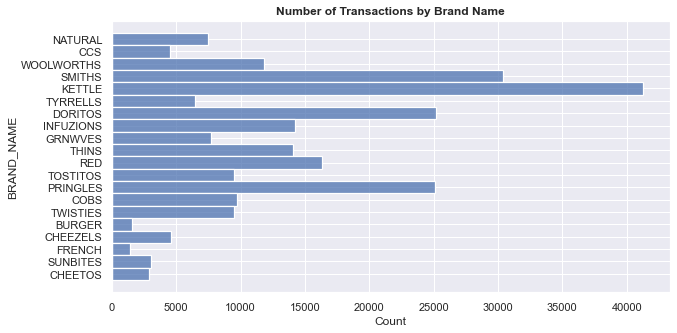

In [29]:
#this will plot a histogram looking at number of transactions per brand name

plt.figure(figsize=[10,5])

ax = sns.histplot(data = df_wrangle, y='BRAND_NAME')
ax.set_title('Number of Transactions by Brand Name', weight='bold');

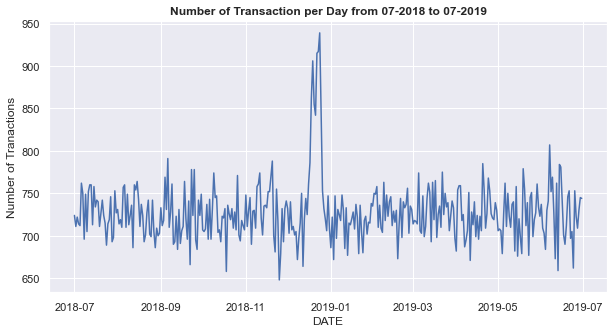

In [30]:
#this lineplot looks at number of transactions per day for the entire year

plt.figure(figsize = [10,5])
ax = sns.lineplot(data = df_date, x='DATE', y='TXN_ID')
ax.set_title('Number of Transaction per Day from 07-2018 to 07-2019', weight='bold')
plt.ylabel('Number of Tranactions');

In [31]:
#this second dataframe focuses on December as there is a spike in transactions.  Noticed 12-25 is missing, which might
#explain why there is only 364 values.

df_date2 = df_date.query('DATE >= "2018-12-01" & DATE <= "2018-12-31"')
df_date2

,DATE,TXN_ID
153,2018-12-01,732
154,2018-12-02,703
155,2018-12-03,740
156,2018-12-04,707
157,2018-12-05,711
158,2018-12-06,701
159,2018-12-07,705
160,2018-12-08,672
161,2018-12-09,697
162,2018-12-10,715


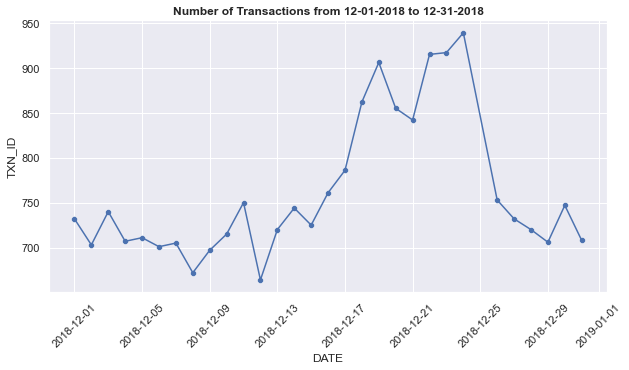

In [32]:
#this combines a scatterplot labeling each day as well as a line graph showing the number of transactions
#per day in December

plt.figure(figsize = [10,5])
ax = sns.scatterplot(data = df_date2, x='DATE', y='TXN_ID')
ax.set_title('Number of Transactions from 12-01-2018 to 12-31-2018', weight='bold')
sns.lineplot(data = df_date2, x='DATE', y='TXN_ID')
plt.xticks(rotation=45);

In [33]:
#this function looks at bivariate analysis between total sales and a certain column name going into the function
#if the column name is PROD_NAME or STORE_NBR, it will create a top 10 and bottom 10 as well as a linegraph
#Finally, it will return the graph

def sales_graph(col_name):
    df_sales = df_wrangle[[col_name, 'TOT_SALES']]
    df_sales = df_sales.groupby(by=col_name, as_index=False).sum()
    df_sales = df_sales.sort_values(by='TOT_SALES', ascending = False)
    df_sales = df_sales.reset_index(drop=True)
    
    blue = sns.color_palette()[0]
    
    if col_name == 'PROD_NAME' or col_name =='STORE_NBR':
        fig = plt.figure(figsize=[14,8])
        plt.subplot(2,2,1)
        ax = sns.barplot(data = df_sales[df_sales.shape[0]-10:df_sales.shape[0]], y=col_name, x='TOT_SALES', color=blue)
        ax.set_title('Bottom 10 ' + col_name, weight='bold')
        plt.ylabel('')
        
        plt.subplot(2,2,2)
        ax = sns.barplot(data = df_sales[:10], y=col_name, x='TOT_SALES', color=blue)
        ax.set_title('Top 10 ' + col_name, weight='bold')
        plt.ylabel('')
        
        plt.subplot(2,2,3)
        ax = sns.lineplot(data = df_sales, x=col_name, y='TOT_SALES', color=blue)
        ax.set_title('Line Plot of ' + col_name, weight='bold')
        plt.xticks([])
        plt.ylabel('')
        
        plt.subplots_adjust(wspace=0.8, hspace=0.4)
        return fig
        
    else:
        g = sns.barplot(data = df_sales, y=col_name, x='TOT_SALES', color=blue)
        plt.ylabel('');
        return g

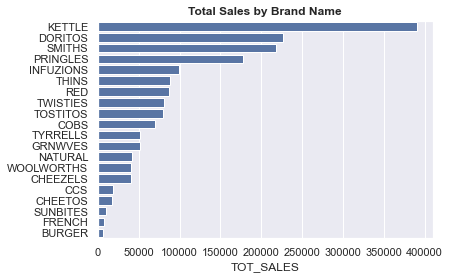

In [34]:
#Looking at Brand Name using the sales_graph function showing total sales per brand name

g1 = sales_graph('BRAND_NAME')
g1.set_title('Total Sales by Brand Name', weight='bold');

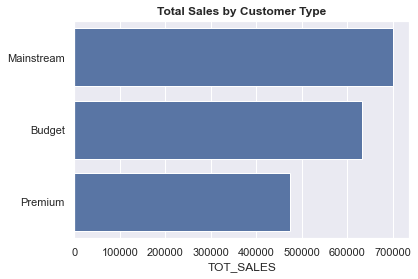

In [35]:
#looking at which type of customer creates the most sales

g2 = sales_graph('PREMIUM_CUSTOMER')
g2.set_title('Total Sales by Customer Type', weight='bold');

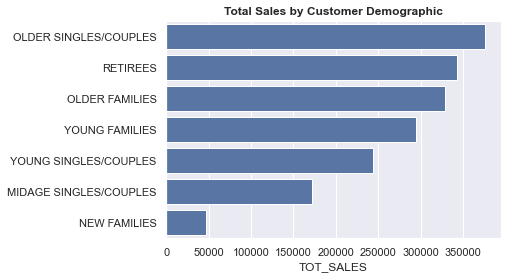

In [36]:
#this graph shows total sales by customer demographic

g3 = sales_graph('LIFESTAGE')
g3.set_title('Total Sales by Customer Demographic', weight='bold');

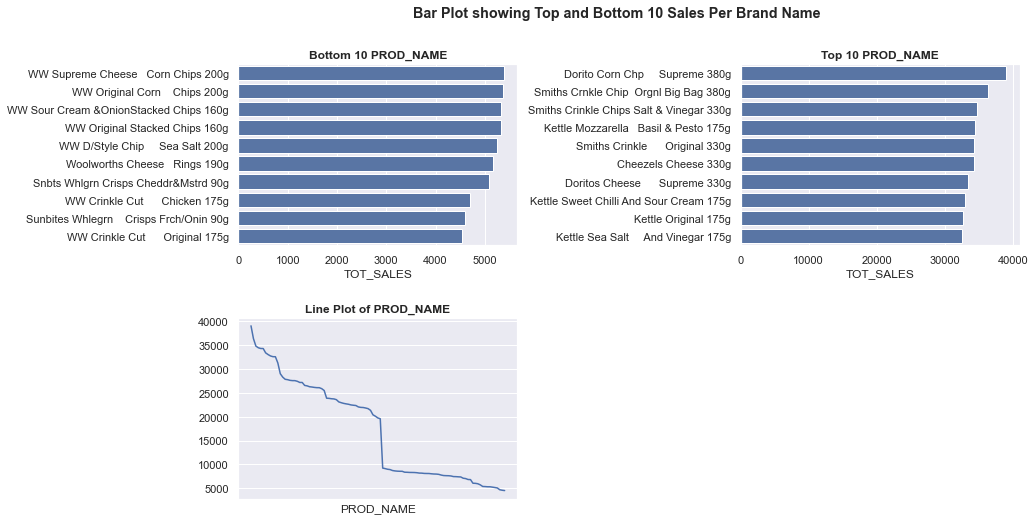

In [37]:
#this shows the bottom and top performing chips as well as having a linegraph showing range of sales

g4 = sales_graph('PROD_NAME')
g4.suptitle('Bar Plot showing Top and Bottom 10 Sales Per Brand Name', weight='bold');

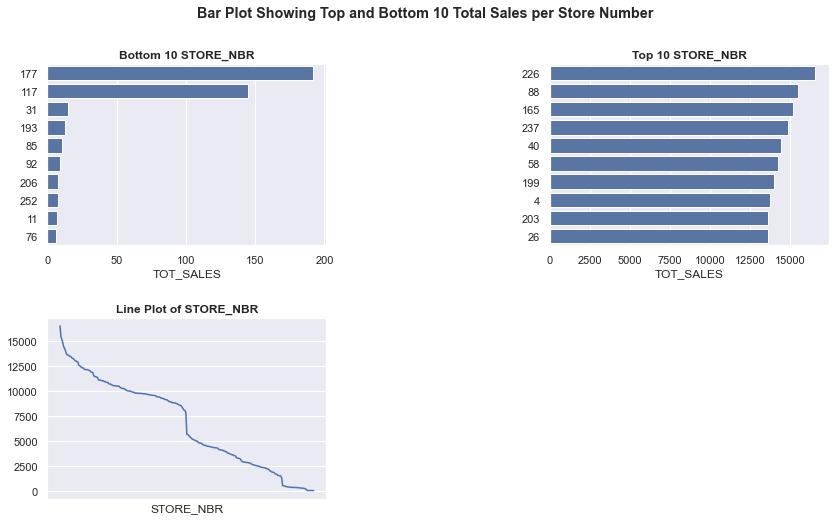

In [38]:
#these graphs focus on the top and bottom performing stores as well as show the range of total sales on chips per store

g5 = sales_graph('STORE_NBR');
g5.suptitle('Bar Plot Showing Top and Bottom 10 Total Sales per Store Number', weight='bold');

In [39]:
#this dataframe grabs brand_name, premium_customer, and total_sales and groups by brand_name and premium customer by taking
#the sum of total_sales

df_group1 = df_wrangle[['BRAND_NAME', 'PREMIUM_CUSTOMER', 'TOT_SALES']]
df_group1 = df_group1.groupby(by=['BRAND_NAME', 'PREMIUM_CUSTOMER'], as_index=False).sum()
df_group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BRAND_NAME        60 non-null     object 
 1   PREMIUM_CUSTOMER  60 non-null     object 
 2   TOT_SALES         60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


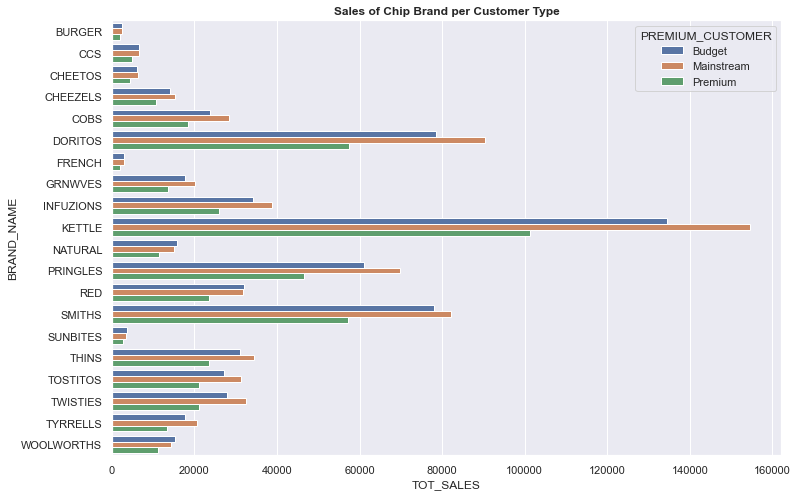

In [40]:
#this graphs all the brands of chips and shows sales per customer type

plt.figure(figsize=[12,8])

g6 = sns.barplot(data=df_group1, y='BRAND_NAME', x='TOT_SALES', hue='PREMIUM_CUSTOMER', ci=None)
g6.set_title('Sales of Chip Brand per Customer Type', weight='bold');

In [41]:
#the second group, grabs premium customer, lifestage, and total sales then groups by premium customer and lifestage
#by taking the sum of tot_sales

df_group2 = df_wrangle[['PREMIUM_CUSTOMER', 'LIFESTAGE', 'TOT_SALES']]
df_group2 = df_group2.groupby(by=['PREMIUM_CUSTOMER', 'LIFESTAGE'], as_index=False).sum()
df_group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PREMIUM_CUSTOMER  21 non-null     object 
 1   LIFESTAGE         21 non-null     object 
 2   TOT_SALES         21 non-null     float64
dtypes: float64(1), object(2)
memory usage: 672.0+ bytes


In [42]:
#this adds up all total sales in the tot_sales column

total_sales = df_group2['TOT_SALES'].sum()
total_sales

1805177.699999998

In [43]:
#this creates a prop column by dividing each value in that column by total_sales and multiplying it by 100

df_group2['PROP'] = (df_group2['TOT_SALES'] / total_sales) * 100

In [44]:
#displaying df_group2 dataframe

df_group2

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,PROP
0,Budget,MIDAGE SINGLES/COUPLES,33345.70,1.847225
1,Budget,NEW FAMILIES,20607.45,1.141575
2,Budget,OLDER FAMILIES,156863.75,8.689657
3,Budget,OLDER SINGLES/COUPLES,127833.60,7.081497
4,Budget,RETIREES,105916.30,5.867361
5,Budget,YOUNG FAMILIES,129717.95,7.185883
6,Budget,YOUNG SINGLES/COUPLES,57122.10,3.164348
7,Mainstream,MIDAGE SINGLES/COUPLES,84734.25,4.693956
8,Mainstream,NEW FAMILIES,15979.70,0.885215
9,Mainstream,OLDER FAMILIES,96413.55,5.340945


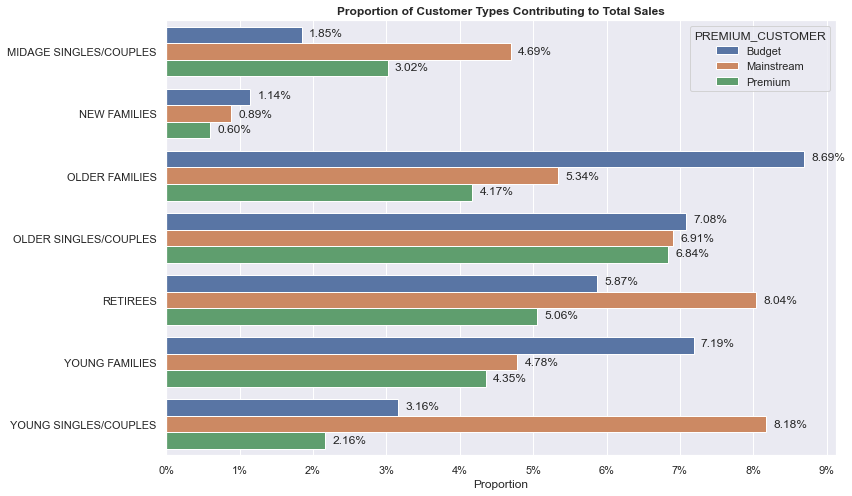

In [45]:
#creating bar graph showing proportion of customers contributing to total sales
#top 3 include older families-budget, mainstream-retirees, and budget-young families
#it also displays a text value showing each percentage for each customer demographic and group

plt.figure(figsize=[12,8])

prop = np.arange(0, 10, 1)
prop_label = [str(x)+'%' for x in prop]

g = sns.barplot(data=df_group2, x='PROP', y='LIFESTAGE', hue='PREMIUM_CUSTOMER')
g.set_title('Proportion of Customer Types Contributing to Total Sales', weight='bold')
plt.xlabel('Proportion')
plt.ylabel('')
plt.xticks(prop, prop_label)

for x in range(21):
    prop = df_group2['PROP'][x]
    prop_str = '{:0.2f}%'.format(prop)
    if x < 7:
        plt.text(prop+0.1, x - 0.25, prop_str)
    elif x < 14 and x >= 7:
        plt.text(prop+0.1, x%7 + 0.05, prop_str)
    else:
        plt.text(prop+0.1, x%7 + 0.3, prop_str)

In [55]:
df_group2.to_csv('ExcelData1_1.csv', index=False)

In [46]:
#creating third grouping dataframe extracting premium customer, lifestage, and loyalty card number
#next is drops any duplicate loyalty card number focusing on number of different customers
#then it groups by premium customer and lifestage by counting the number of unique customers
#finally it renames the lylty_card_nbr column to count then displays the dataframe

df_group3 = df_wrangle[['PREMIUM_CUSTOMER', 'LIFESTAGE', 'LYLTY_CARD_NBR']]
df_group3 = df_group3.drop_duplicates('LYLTY_CARD_NBR')
df_group3 = df_group3.groupby(by=['PREMIUM_CUSTOMER', 'LIFESTAGE'], as_index=False).count()
df_group3 = df_group3.rename(columns={'LYLTY_CARD_NBR':'COUNT'})
df_group3

,PREMIUM_CUSTOMER,LIFESTAGE,COUNT
0,Budget,MIDAGE SINGLES/COUPLES,1474
1,Budget,NEW FAMILIES,1087
2,Budget,OLDER FAMILIES,4611
3,Budget,OLDER SINGLES/COUPLES,4849
4,Budget,RETIREES,4385
5,Budget,YOUNG FAMILIES,3953
6,Budget,YOUNG SINGLES/COUPLES,3647
7,Mainstream,MIDAGE SINGLES/COUPLES,3298
8,Mainstream,NEW FAMILIES,830
9,Mainstream,OLDER FAMILIES,2788


In [47]:
#summing up total count of unique customers

total_count = df_group3['COUNT'].sum()
total_count

71287

In [48]:
#calculating a proportion dividing the count values in that column by total_count then multiplying by 100

df_group3['PROP'] = (df_group3['COUNT'] / total_count)*100

In [49]:
#displaying the third dataframe

df_group3

,PREMIUM_CUSTOMER,LIFESTAGE,COUNT,PROP
0,Budget,MIDAGE SINGLES/COUPLES,1474,2.067698
1,Budget,NEW FAMILIES,1087,1.524822
2,Budget,OLDER FAMILIES,4611,6.468220
3,Budget,OLDER SINGLES/COUPLES,4849,6.802082
4,Budget,RETIREES,4385,6.151192
5,Budget,YOUNG FAMILIES,3953,5.545191
6,Budget,YOUNG SINGLES/COUPLES,3647,5.115940
7,Mainstream,MIDAGE SINGLES/COUPLES,3298,4.626369
8,Mainstream,NEW FAMILIES,830,1.164308
9,Mainstream,OLDER FAMILIES,2788,3.910952


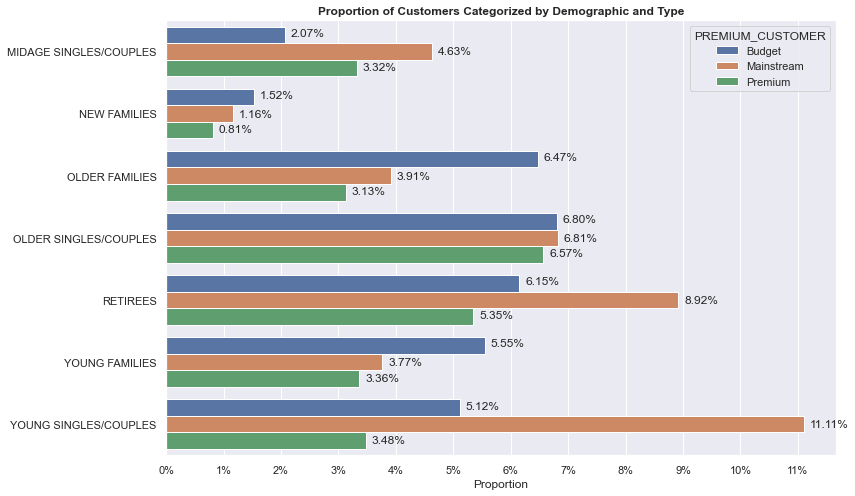

In [50]:
#similar to the previous barplot, it displays the proportion of customers by type and demographic then displays
#the percentage to each group. Mainstream young singles/couples account for most of the customers followed by mainstream
#retirees

plt.figure(figsize=[12,8])

prop = np.arange(0, 12, 1)
prop_label = [str(x)+'%' for x in prop]

g = sns.barplot(data=df_group3, x='PROP', y='LIFESTAGE', hue='PREMIUM_CUSTOMER')
g.set_title('Proportion of Customers Categorized by Demographic and Type', weight='bold')
plt.xlabel('Proportion')
plt.ylabel('')
plt.xticks(prop, prop_label)

for x in range(21):
    prop = df_group3['PROP'][x]
    prop_str = '{:0.2f}%'.format(prop)
    if x < 7:
        plt.text(prop+0.1, x - 0.25, prop_str)
    elif x < 14 and x >= 7:
        plt.text(prop+0.1, x%7 + 0.05, prop_str)
    else:
        plt.text(prop+0.1, x%7 + 0.3, prop_str)

In [56]:
df_group3.to_csv('ExcelData1_2.csv', index=False)

In [51]:
#the fourth group extracts lylty_card_number, prod_qty, premium_customer, and lifestage
#next it groups each customer by summing up the prod_qty, then groups it again by taking the average of quantity
#purchased for each customer demographic and type then displays the dataframe

df_group4 = df_wrangle[['LYLTY_CARD_NBR','PROD_QTY', 'PREMIUM_CUSTOMER', 'LIFESTAGE']]
df_group4 = df_group4.groupby(by=['PREMIUM_CUSTOMER', 'LIFESTAGE', 'LYLTY_CARD_NBR'], as_index=False).sum()
df_group4 = df_group4.groupby(by=['PREMIUM_CUSTOMER', 'LIFESTAGE'], as_index=False).mean()
df_group4

,PREMIUM_CUSTOMER,LIFESTAGE,LYLTY_CARD_NBR,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,139568.736771,6.026459
1,Budget,NEW FAMILIES,135402.718491,4.821527
2,Budget,OLDER FAMILIES,135762.774019,9.076773
3,Budget,OLDER SINGLES/COUPLES,137848.987008,6.781398
4,Budget,RETIREES,136730.930445,6.141847
5,Budget,YOUNG FAMILIES,136932.194789,8.722995
6,Budget,YOUNG SINGLES/COUPLES,134862.341376,4.250069
7,Mainstream,MIDAGE SINGLES/COUPLES,134471.814130,6.432080
8,Mainstream,NEW FAMILIES,131650.580723,4.891566
9,Mainstream,OLDER FAMILIES,135539.159254,9.255380


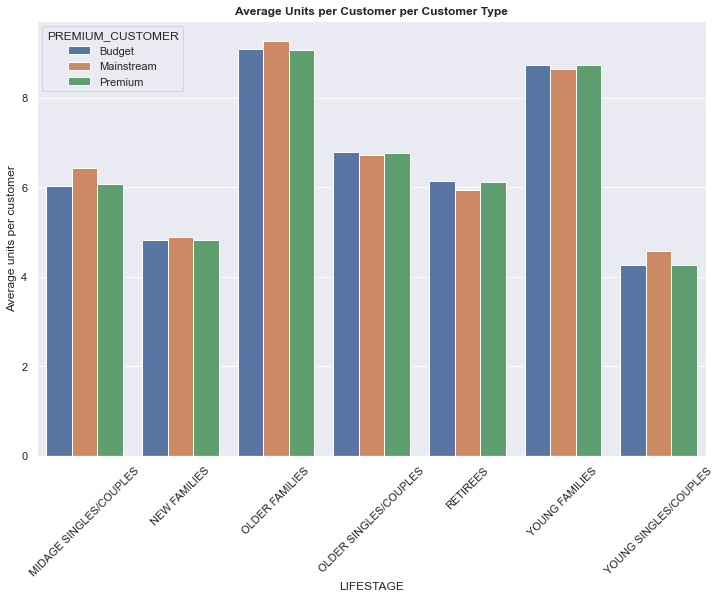

In [52]:
#this displays a bar graph showing each customer demographic and type showing the average units purchased per customer
#older and young families tend to purchase the most chips on average despite the type of group they are in

plt.figure(figsize = [12,8])

g = sns.barplot(data=df_group4, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', ci=None)
g.set_title('Average Units per Customer per Customer Type', weight='bold')
plt.ylabel('Average units per customer')
plt.xticks(rotation=45);

In [53]:
#the fifth group looks at unit price per transaction. It extracts prod_qty, tot_sales, lifestage, and premium_customer
#then calculates unit_price then groups it by the average unit price for each customer demographic and type

df_group5 = df_wrangle[['PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER']]
df_group5['UNIT_PRICE'] = df_group5['TOT_SALES'] / df_group5['PROD_QTY']
df_group5 = df_group5[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'UNIT_PRICE']]
df_group5 = df_group5.groupby(by=['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False).mean()
df_group5

<ipython-input-53-ff8ba6781b56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group5['UNIT_PRICE'] = df_group5['TOT_SALES'] / df_group5['PROD_QTY']


,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


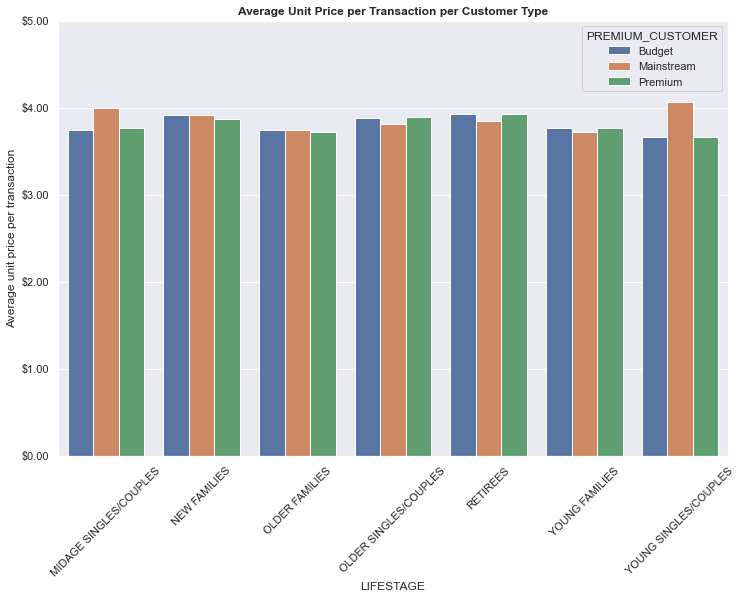

In [54]:
#This bar graph displays the average unit price per 

plt.figure(figsize=[12,8])
ticks = np.arange(0, 5.0+1.0, 1.0)
tick_val = ['${:0.2f}'.format(x) for x in ticks]

g5 = sns.barplot(data=df_group5, x='LIFESTAGE', y='UNIT_PRICE', hue='PREMIUM_CUSTOMER', ci=None)
g5.set_title('Average Unit Price per Transaction per Customer Type', weight='bold')
plt.ylabel('Average unit price per transaction')
plt.yticks(ticks, tick_val)
plt.xticks(rotation=45);